In [4]:
import numpy as np
from scipy import optimize
import pandas as pd

class costing:
    all_w = []
    mi = 0
    ma = 0
    J_his = [[]]
    def data_clean(self,data): # 'data' is a pandas dataframe
        y = data['label']
        data.dropna(subset=['label'], inplace=True)
        del data['label']
        self.mi = data.min()
        self.ma = data.max()
        data = (data - self.mi)/(self.ma - self.mi)
        num = 0
        X = []
        for i in data:
            X.append(data[i])
        X = np.array(X).T                  # Normalized 'X' (numpy array)
        return X, y

    def sigmoid(self,z):        
        return 1.0 / (1.0 + np.exp(-z))
    
    # Regularized cost function definition
    def costFunctionReg(self,w,X,y,lambda_):
        J= 0
        X= np.transpose(X)
        temp = self.sigmoid(w@X)
        X = np.transpose(X)
        J = np.sum(np.log(temp**y)) + np.sum(np.log((1-temp)**(1-y)))
        J = (-J)/len(y)
        w1 = w*w
        w1[0] = 0
        J+=np.sum(w1)*lambda_/(2*len(y))
        grad = ((temp-y)/len(y))@(X)
        temp1 = grad[0]
        grad = grad+ (lambda_/len(y))*w   
        grad[0] = temp1 
        self.J_his[-1].append(J)
        return J, grad
    
    # Prediction based on trained model
    # Using sigmoid function to calculate probability rounded off to either 0 or 1
    def predictOneVsAll(self,all_w,X,num_labels):
        X = X.T
        a = all_w@X
        X = X.T
        p = np.unravel_index(np.argmax(a, axis=0), a.shape)[1]    # 'p' should be a vector of size equal to that of vector 'y'
        
        return p
    
    # Optimization defintion
    def minCostFun(self, train_data): #'train_data' is a pandas dataframe
        X, y = self.data_clean(train_data)
        num_labels = y.unique().shape[0]
        X =  np.c_[np.ones(y.shape[0]), X]
        lambda_ = 0.1        # Regularization parameter
        iters = 4000
        
        all_w = np.zeros((num_labels,X.shape[1]))
        for i in range(num_labels):
            w_ini = np.zeros(X.shape[1])
            c = (y == i)
            res= optimize.minimize(self.costFunctionReg, w_ini, (X, c, lambda_), jac=True, method = 'CG', options={'maxiter': iters})
            self.J_his.append([])
            all_w[i] = res.x
        all_w = np.round(all_w, 3)       # Optimized weights (size = 10 X 785) rounded off to 3 decimal places
        p = self.predictOneVsAll(all_w, X, num_labels)
        num = (float)(np.sum(p==y))
        
        acrcy = num*100/y.shape[0]       # Training set accuracy (in %) rounded off to 3 decimal places (Ans ~ 93.2)
        self.all_w = all_w
        return all_w, acrcy
    
    # Calculate testing accuracy
    def TestingAccu(self, test_data): #'test_data' is a pandas dataframe
        y = test_data['label']
        test_data.dropna(subset=['label'], inplace=True)
        del test_data['label']
        test_data = (test_data - self.mi)/(self.ma-self.mi)
        X = test_data 
        X =  np.c_[np.ones(y.shape[0]), X]
        p = self.predictOneVsAll(self.all_w, X, self.all_w.shape[0])
        acrcy_test = (float)(np.sum(y==p))*100/y.shape[0]    # Training set accuracy (in %) rounded off to 3 decimal places (Ans ~ 86.667)
        
        return acrcy_test

In [5]:
data = pd.read_csv('fashion-mnist_train.csv')
n = costing()

all_w, arcry = (n.minCostFun(data))
print("Accuracy of model for Training data :",arcry)

data = pd.read_csv('fashion-mnist_test.csv')
print("Acurracy Of model for Testing data :",n.TestingAccu(data))

Accuracy of model for Training data : 93.24
Acurracy Of model for Testing data : 86.66666666666667


Text(0, 0.5, 'Cost')

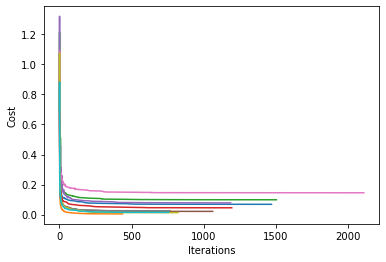

In [6]:
# Question 3 (Cost history of all labels string from same point in graph)
from matplotlib import pyplot as plt
for i in range(10):
    plt.plot(range(len(n.J_his[i])), n.J_his[i])
plt.xlabel("Iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

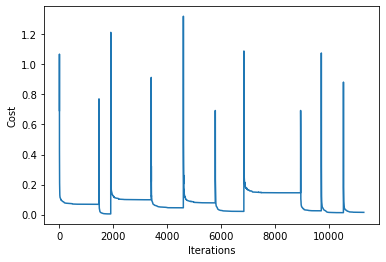

In [7]:
# Question 3 continued (Cost history of consecutive labels in a line 
#                       with each peak indicating its starting iteration)
x = []
for i in n.J_his:
    x.extend(i)
plt.plot(range(len(x)),x)
plt.xlabel("Iterations")
plt.ylabel("Cost")

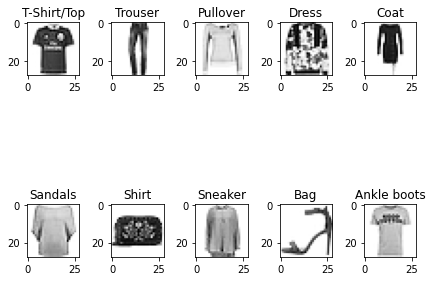

In [8]:
n = costing()
data = pd.read_csv('fashion-mnist_train.csv')
X, y = n.data_clean(data)
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(6,6))
labels = ["T-Shirt/Top","Trouser","Pullover","Dress","Coat","Sandals","Shirt","Sneaker","Bag","Ankle boots"]
for i in range(10):
    x = []
    for j in range(28):
        x.append(X[i, j*28: j*28+28])
    ax[i//5][i%5].imshow(x, cmap='Greys')
    ax[i//5][i%5].set_title(labels[i])
fig.tight_layout()

In [ ]:
# Question 5 : plotting first 10 images in test data
data = pd.read_csv('fashion-mnist_train.csv')
n = costing()
n.minCostFun(data)

test_data = pd.read_csv('fashion-mnist_test.csv')
y = test_data['label']
test_data.dropna(subset=['label'], inplace=True)
del test_data['label']
test_data = (test_data - n.mi)/(n.ma-n.mi)
X = []
for i in data:
    X.append(test_data[i])
X = np.array(X).T
X =  np.c_[np.ones(y.shape[0]), X]
labels = ["T-Shirt/Top","Trouser","Pullover","Dress","Coat","Sandals","Shirt","Sneaker","Bag","Ankle boots"]
p = n.predictOneVsAll(n.all_w, X, n.all_w.shape[0])

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(6,6))
for i in range(10):
    x = []
    for j in range(28):
        x.append(X[i, j*28: j*28+28])
    ax[i//5][i%5].imshow(x, cmap='Greys')
    ax[i//5][i%5].set_title(labels[i])
fig.tight_layout()